In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -r "/content/drive/MyDrive/AI _engineer_program/part_4/mission/mission_16/requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823

In [ ]:
# [1] 라이브러리 임포트
import os
import torch
import torch.nn as nn
import torch.optim as optim
# 최적화 알고리즘(SGD, Adam 등) 사용
from torch.utils.data import DataLoader
# 데이터 배치 처리 및 반복자 구성
from torchvision import datasets, transforms
# MNIST 등 공개 데이터셋과 이미지 변환 도구 사용

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

os.makedirs("models", exist_ok=True)
# 모델 저장 폴더 생성


In [ ]:
# [2] 하이퍼파라미터 및 디바이스
batch_size = 128
epochs = 2
lr = 1e-3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# GPU 사용 가능 시 cuda, 아니면 cpu 선택


In [ ]:
# [3] 데이터셋 준비(MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    # 이미지를 [0,1] 텐서로 변환
    transforms.Normalize((0.1307,), (0.3081,))
    # MNIST 평균/표준편차로 정규화
])

train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_ds  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 21669783.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 709258.59it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 5900986.61it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 6748327.58it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# [4] CNN 모델 정의
class MnistCNN(nn.Module):
    # MNIST 28x28 흑백 이미지 분류용 소형 CNN 정의
    def __init__(self):
        super().__init__()
        # 부모 클래스 초기화
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),  # 입력 채널 1, 출력 채널 32, 커널 3
            nn.ReLU(),                        # 비선형 활성함수 적용
            nn.MaxPool2d(2),                  # 28x28 -> 14x14 다운샘플링
            nn.Conv2d(32, 64, 3, padding=1),  # 32->64 채널 확대
            nn.ReLU(),                        # 활성함수 적용
            nn.MaxPool2d(2)                   # 14x14 -> 7x7 다운샘플링
        )
        # 합성곱 특징 추출 블록 정의
        self.classifier = nn.Sequential(
            nn.Flatten(),                     # 64x7x7 텐서를 1차원으로 변환
            nn.Linear(64*7*7, 128),           # 전결합층
            nn.ReLU(),                        # 활성함수
            nn.Linear(128, 10)                # 10개 숫자 클래스 로짓 출력
        )
        # 분류기 블록 정의

    def forward(self, x):
        x = self.features(x)                  # 합성곱 특징 추출 경로 적용
        x = self.classifier(x)                # 분류기 경로 적용
        return x                              # 로짓 출력 반환

model = MnistCNN().to(device)
# 모델 인스턴스 생성 및 디바이스 배치


In [ ]:
# [5] 손실함수/옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
# [6] 학습 루프

def evaluate(model):
    # 검증 집합 정확도 계산 함수 정의
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)         # 디바이스 이동
            logits = model(x)                          # 순전파 계산
            pred = logits.argmax(dim=1)                # 예측 클래스 산출
            correct += (pred == y).sum().item()        # 일치 수 누적
            total += y.size(0)                         # 전체 수 누적
    return correct / total                              # 정확도 반환

for ep in range(1, epochs+1):
    model.train()
    # 학습 모드 전환
    loop = tqdm(train_loader, desc=f"Epoch {ep}/{epochs}")
    # 진행바 출력
    for x, y in loop:
        x, y = x.to(device), y.to(device)              # 디바이스 이동
        optimizer.zero_grad()                          # 기울기 초기화
        logits = model(x)                              # 순전파
        loss = criterion(logits, y)                    # 손실 계산
        loss.backward()                                # 역전파
        optimizer.step()                               # 가중치 갱신
        loop.set_postfix(loss=loss.item())             # 진행바에 손실 표시
    acc = evaluate(model)
    print(f"Val Acc: {acc:.4f}")
    # 에폭 종료 후 검증 정확도 출력


Epoch 1/2: 100%|██████████| 469/469 [01:24<00:00,  5.53it/s, loss=0.0754]


Val Acc: 0.9856


Epoch 2/2: 100%|██████████| 469/469 [01:23<00:00,  5.64it/s, loss=0.0582]


Val Acc: 0.9840


In [ ]:
# [7] FP32 PyTorch 저장(.pth)
fp32_path = "models/mission_16_mnist_cnn.pth"
torch.save(model.state_dict(), fp32_path)

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 135.2 MB/s eta 0:00:00


In [ ]:
# [9] ONNX 내보내기(.onnx)
model.eval()
# 내보내기 전 평가모드 전환
dummy = torch.randn(1, 1, 28, 28, device=device)
onnx_path = "models/mission_16_mnist_cnn.onnx"


torch.onnx.export(
    model,                          # 내보낼 PyTorch 모델
    dummy,                          # 예시 입력 텐서
    onnx_path,                      # 출력 파일 경로
    input_names=["input"],          # 입력 노드 이름
    output_names=["logits"],        # 출력 노드 이름
    dynamic_axes={"input": {0: "batch"}, "logits": {0: "batch"}},
    opset_version=17
)


/tmp/ipython-input-3977732381.py:11: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(


In [ ]:
# [8] 동적 양자화(int8, Linear 계층 대상) 저장(.pth)
# 주의: CNN의 Conv2d는 기본 동적 양자화 대상이 아님(Linear/LSTM 주 대상).
# 여기서는 classifier의 Linear에 대해 동적 양자화 적용.
quantized_model = torch.quantization.quantize_dynamic(
    model, {nn.Linear}, dtype=torch.qint8
)
# 동적 양자화를 통해 Linear 계층 가중치를 int8로 압축 및 가속

int8_path = "models/mission_16_mnist_cnn_int8.pth"
torch.save(quantized_model.state_dict(), int8_path)


/tmp/ipython-input-3504789796.py:4: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = torch.quantization.quantize_dynamic(


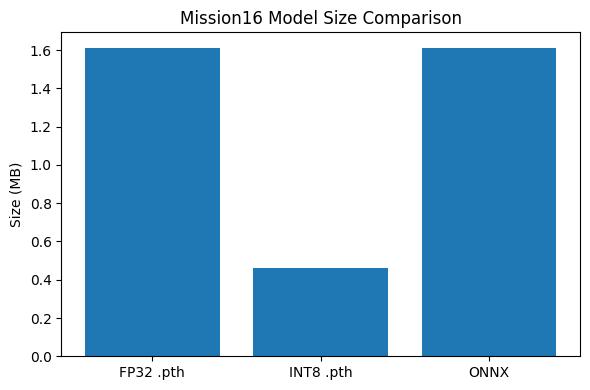

In [ ]:
# [10] 파일 용량 비교 그래프 생성 및 저장(보고서용 이미지)
def file_mb(path):
    # 바이트를 메가바이트로 변환하여 용량 계산
    return os.path.getsize(path) / (1024*1024)

sizes = {
    "FP32 .pth": file_mb(fp32_path),
    "INT8 .pth": file_mb(int8_path),
    "ONNX": file_mb(onnx_path)
}
# 세 종류 모델 파일 용량 수집

plt.figure(figsize=(6,4))
# 그림 크기 설정

plt.bar(list(sizes.keys()), list(sizes.values()))
# 막대그래프로 용량 시각화

plt.ylabel("Size (MB)")
# y축 라벨 설정

plt.title("Mission16 Model Size Comparison")
# 그래프 제목 설정

plt.tight_layout()
# 레이아웃 간격 자동 조정

os.makedirs("report", exist_ok=True)
# 보고서 폴더 보장

plt.savefig("report/sizes_and_results.png", dpi=150)
# 보고서 첨부용 이미지 파일 저장
plt.show()


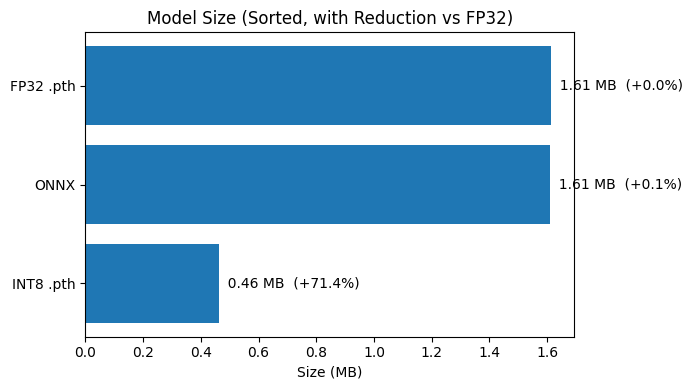

In [ ]:
# [A-1] 공통 준비: 파일 용량 읽기 함수와 데이터 딕셔너리 생성
import os                                # 파일 용량 확인
import matplotlib.pyplot as plt           # 시각화

def file_mb(path):                        # 바이트 → MB 변환 함수 정의
    return os.path.getsize(path) / (1024*1024)

fp32_path = "models/mission_16_mnist_cnn.pth"
int8_path = "models/mission_16_mnist_cnn_int8.pth"
onnx_path = "models/mission_16_mnist_cnn.onnx"

sizes = {                                  # 모델별 용량 수집
    "FP32 .pth": file_mb(fp32_path),
    "INT8 .pth": file_mb(int8_path),
    "ONNX": file_mb(onnx_path),
}

# [A-2] 절감률 계산(기준: FP32)
base = sizes["FP32 .pth"]                  # 기준 용량 선택
reductions = {k: (1 - (v / base)) * 100 for k, v in sizes.items()}  # 절감률(%) 계산

# [A-3] 값 기준 오름차순 정렬
labels = sorted(sizes, key=sizes.get)      # 크기 작은 순 정렬
values = [sizes[k] for k in labels]        # 정렬된 용량 리스트 생성

# [A-4] 가로 막대 시각화
plt.figure(figsize=(7, 4))                 # 도화지 크기 지정
plt.barh(labels, values)                   # 가로 막대 그래프 생성
for i, v in enumerate(values):             # 각 막대에 수치 라벨 표기
    pct = reductions[labels[i]]            # 절감률 가져오기
    plt.text(v, i, f"  {v:.2f} MB  ({pct:+.1f}%)", va='center')  # 용량/절감률 라벨 추가

plt.xlabel("Size (MB)")                    # x축 라벨 표시
plt.title("Model Size (Sorted, with Reduction vs FP32)")  # 제목 표시
plt.tight_layout()                          # 레이아웃 정리
os.makedirs("report", exist_ok=True)        # 저장 폴더 보장
plt.savefig("report/vis_barh_sorted.png", dpi=150)  # 파일 저장
plt.show()                                  # 화면 표시


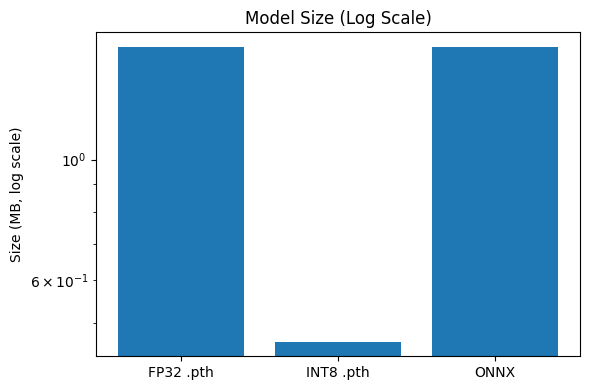

In [ ]:
# [B] 로그 스케일 막대그래프
plt.figure(figsize=(6, 4))                          # 도화지 크기 지정
plt.bar(list(sizes.keys()), list(sizes.values()))   # 막대그래프 생성
plt.yscale("log")                                   # y축 로그 스케일 적용
plt.ylabel("Size (MB, log scale)")                  # y축 라벨 표시
plt.title("Model Size (Log Scale)")                 # 제목 표시
plt.tight_layout()                                  # 레이아웃 정리
plt.savefig("report/vis_bar_log.png", dpi=150)      # 파일 저장
plt.show()                                          # 화면 표시


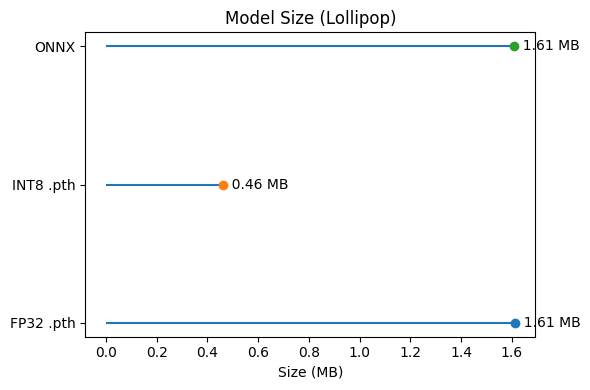

In [ ]:
# [C] 로리팝(lollipop) 차트
labels = list(sizes.keys())                 # 라벨 목록 생성
values = [sizes[k] for k in labels]         # 값 목록 생성
ypos = range(len(labels))                   # y좌표 인덱스 생성

plt.figure(figsize=(6, 4))                  # 도화지 크기 지정
for y, v in zip(ypos, values):              # 각 항목 선+점 그리기
    plt.hlines(y, 0, v)                     # 원점→값까지 수평선 표시
    plt.plot(v, y, 'o')                     # 끝점에 마커 표시
    plt.text(v, y, f"  {v:.2f} MB", va='center')  # 수치라벨 표기

plt.yticks(list(ypos), labels)              # y축 눈금 라벨 설정
plt.xlabel("Size (MB)")                     # x축 라벨 표시
plt.title("Model Size (Lollipop)")          # 제목 표시
plt.tight_layout()                          # 레이아웃 정리
plt.savefig("report/vis_lollipop.png", dpi=150)  # 파일 저장
plt.show()                                  # 화면 표시


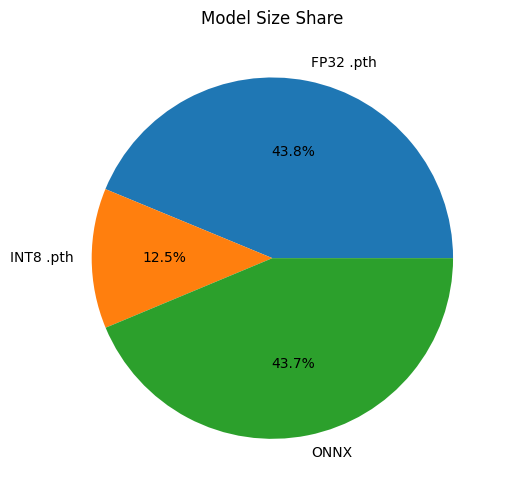

In [ ]:
# [D] 파이 차트
plt.figure(figsize=(5.2, 5.2))                           # 정사각형 형태 확보
plt.pie(list(sizes.values()), labels=list(sizes.keys()), autopct="%.1f%%")
# 각 조각 비율 표시

plt.title("Model Size Share")                            # 제목 표시
plt.tight_layout()                                       # 레이아웃 정리
plt.savefig("report/vis_pie.png", dpi=150)               # 파일 저장
plt.show()                                               # 화면 표시
